In [1]:
pip install -U textblob

In [2]:
from google.colab import files
uploaded = files.upload()

Saving text_emotion.csv to text_emotion.csv


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import nltk
nltk.download('wordnet')
data = pd.read_csv('text_emotion.csv')

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [4]:
data = data.drop('author', axis=1)
data

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [5]:
#Dropping rows with other emotion labels

data  = data.drop(data[data.sentiment == 'anger'].index)
data  = data.drop(data[data.sentiment == 'boredom'].index)
data  = data.drop(data[data.sentiment == 'enthusiasm'].index)
data  = data.drop(data[data.sentiment == 'empty'].index)
data  = data.drop(data[data.sentiment == 'fun'].index)
data  = data.drop(data[data.sentiment == 'relief'].index)
data  = data.drop(data[data.sentiment == 'surprise'].index)
data  = data.drop(data[data.sentiment == 'love'].index)
data  = data.drop(data[data.sentiment == 'hate'].index)
data  = data.drop(data[data.sentiment == 'neutral'].index)
data  = data.drop(data[data.sentiment == 'worry'].index)

In [6]:
# --- run once if needed ---
%pip install -q emoji==2.10.1 contractions nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 4.4 MB/s eta 0:00:00


In [7]:
import re, nltk, emoji, contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

# --- NLTK resources (safe if run multiple times) ---
for corp in ['stopwords','wordnet','omw-1.4']:
    try: nltk.data.find(f'corpora/{corp}')
    except LookupError: nltk.download(corp)

# tagger names differ across NLTK versions; try both
for tagger in ['averaged_perceptron_tagger', 'averaged_perceptron_tagger_eng']:
    try: nltk.data.find(f'taggers/{tagger}')
    except LookupError:
        try: nltk.download(tagger)
        except: pass

# --- helpers ---
NEGATIONS = {
    'no','nor','not',"don't","didn't","isn't","wasn't","aren't","weren't",
    "won't","can't","couldn't","shouldn't","wouldn't","doesn't","ain't","n't"
}
STOP = set(stopwords.words('english')) - NEGATIONS
WN = WordNetLemmatizer()

def _map_pos(tag):
    return {'J':'a','V':'v','N':'n','R':'r'}.get(tag[:1], 'n')

def clean_tweet(text, lemmatize=True):
    if not isinstance(text, str):
        return ''
    x = text.lower()

    # Twitter-specific
    x = re.sub(r'http\S+|www\.\S+', ' URL ', x)     # URLs -> token
    x = re.sub(r'@\w+', ' USER ', x)                # mentions -> token
    x = re.sub(r'\brt\b', ' ', x)                   # strip retweets
    x = re.sub(r'#(\w+)', r'\1', x)                 # keep hashtag word

    # Emojis / contractions / elongations / numbers
    x = emoji.demojize(x)                           # 🙂 -> :slightly_smiling_face:
    x = contractions.fix(x)                         # can't -> can not
    x = re.sub(r'(.)\1{2,}', r'\1\1', x)            # soooo -> soo
    x = re.sub(r'\d+', ' NUM ', x)                  # numbers -> token

    # Punctuation & whitespace
    x = re.sub(r'[^\w\s]', ' ', x)                  # keep letters/numbers/underscore
    x = re.sub(r'\s+', ' ', x).strip()

    # Lemmatize (optional; set lemmatize=False if slow)
    if lemmatize and x:
        toks = x.split()
        tags = pos_tag(toks)
        x = ' '.join(WN.lemmatize(w, _map_pos(t)) for w, t in tags)

    # Stopwords (keep negations)
    toks = [w for w in x.split() if w not in STOP]
    return ' '.join(toks)

# ---- APPLY HERE ----
data['content_clean'] = data['content'].apply(clean_tweet)

# (Optional) quick sanity check
print(data[['content','content_clean']].head(3))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


                                             content  \
1  Layin n bed with a headache  ughhhh...waitin o...   
2                Funeral ceremony...gloomy friday...   
6  I should be sleep, but im not! thinking about ...   

                                       content_clean  
1              layin n bed headache ughh waitin call  
2                     funeral ceremony gloomy friday  
6  sleep not think old friend want marry damn amp...  


In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Lowercasing
data['content'] = data['content'].str.lower()

# Removing punctuation/symbols
data['content'] = data['content'].str.replace(r'[^\w\s]', ' ', regex=True)

# Removing stopwords
stop = set(stopwords.words('english'))
data['content'] = data['content'].apply(lambda x: " ".join(word for word in x.split() if word not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Code to find the top 10,000 rarest words (modify according to your dataset)
# appearing in the data
freq = pd.Series(' '.join(data['content']).split()).value_counts()[-10000:]

# Removing all those rarely appearing words from the data
freq = list(freq.index)
data['content'] = data['content'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [10]:
#Encoding output labels 'sadness' as '1' & 'happiness' as '0'
from sklearn import preprocessing
lbl_enc = preprocessing.LabelEncoder()
y = lbl_enc.fit_transform(data.sentiment.values)

# Splitting into training and testing data in 90:10 ratio
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data.content.values, y, stratify=y, random_state=42, test_size=0.1, shuffle=True)
X_train

array(['already get tax money winning pole position ha ha',
       'please please anyone', 'good morning', ...,
       'humous dorito oh yes',
       'posting late got back seeing star trek awesome',
       'sad otalia today'], dtype=object)

In [11]:
# Extracting TF-IDF parameters
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, analyzer='word',ngram_range=(1,3))
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.fit_transform(X_val)

In [12]:
# Extracting Count Vectors Parameters
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(data['content'])
X_train_count =  count_vect.transform(X_train)
X_val_count =  count_vect.transform(X_val)

# Models using the TF-IDF features

## Model 1: Multinomial Naive Bayes Classifier

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
accuracy=[]
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred = nb.predict(X_val_tfidf)
accuracy.append(accuracy_score(y_pred, y_val)*100)
print('naive bayes tfidf accuracy %s' % accuracy_score(y_pred, y_val))
confusion_matrix(y_val, y_pred)

naive bayes tfidf accuracy 0.5163776493256262


array([[253, 268],
       [234, 283]])

## Model 2: Linear SVM

In [14]:
from sklearn.linear_model import SGDClassifier
lsvm = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None)
lsvm.fit(X_train_tfidf, y_train)
y_pred = lsvm.predict(X_val_tfidf)
accuracy.append(accuracy_score(y_pred, y_val)*100)
print('svm using tfidf accuracy %s' %accuracy_score(y_pred, y_val))
confusion_matrix(y_val, y_pred)

svm using tfidf accuracy 0.5366088631984586


array([[230, 291],
       [190, 327]])

## Model 3: logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1)
logreg.fit(X_train_tfidf, y_train)
y_pred = logreg.predict(X_val_tfidf)
accuracy.append(accuracy_score(y_pred, y_val)*100)
print('log reg tfidf accuracy %s' % accuracy_score(y_pred, y_val))
confusion_matrix(y_val, y_pred)

log reg tfidf accuracy 0.5327552986512524


array([[257, 264],
       [221, 296]])

## Model 4: Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train_tfidf, y_train)
y_pred = rf.predict(X_val_tfidf)
accuracy.append(accuracy_score(y_pred, y_val)*100)
print('randon forest tfidf accuracy %s' % accuracy_score(y_pred, y_val))
confusion_matrix(y_val, y_pred)

randon forest tfidf accuracy 0.5366088631984586


array([[298, 223],
       [258, 259]])

# Models using count vectors features

## Model 1: Multinomial Naive Bayes Classifier

In [17]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_count, y_train)
y_pred = nb.predict(X_val_count)
accuracy.append(accuracy_score(y_pred, y_val)*100)
print('naive bayes count vectors accuracy %s' % accuracy_score(y_pred, y_val))
confusion_matrix(y_val, y_pred)

naive bayes count vectors accuracy 0.7726396917148363


array([[390, 131],
       [105, 412]])

## Model 2: Linear SVM

In [18]:
from sklearn.linear_model import SGDClassifier
lsvm = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None)
lsvm.fit(X_train_count, y_train)
y_pred = lsvm.predict(X_val_count)
accuracy.append(accuracy_score(y_pred, y_val)*100)
print('lsvm using count vectors accuracy %s' % accuracy_score(y_pred, y_val))
confusion_matrix(y_val, y_pred)

lsvm using count vectors accuracy 0.7967244701348748


array([[425,  96],
       [115, 402]])

## Model 3: Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1)
logreg.fit(X_train_count, y_train)
y_pred = logreg.predict(X_val_count)
accuracy.append(accuracy_score(y_pred, y_val)*100)
print('log reg count vectors accuracy %s' % accuracy_score(y_pred, y_val))
confusion_matrix(y_val, y_pred)

log reg count vectors accuracy 0.7822736030828517


array([[418, 103],
       [123, 394]])

## Model 4: Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train_count, y_train)
y_pred = rf.predict(X_val_count)
accuracy.append(accuracy_score(y_pred, y_val)*100)
print('random forest with count vectors accuracy %s' % accuracy_score(y_pred, y_val))
confusion_matrix(y_val, y_pred)

random forest with count vectors accuracy 0.7524084778420038


array([[405, 116],
       [141, 376]])

# Graph based analysis

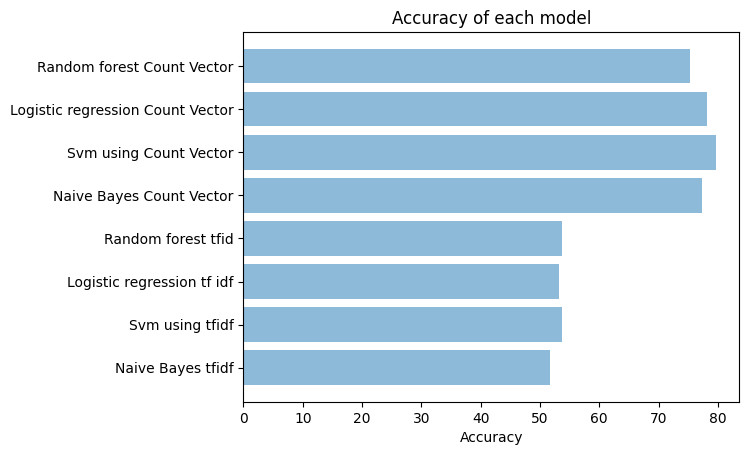

In [21]:
objects = ('Naive Bayes tfidf', 'Svm using tfidf',
           'Logistic regression tf idf', 'Random forest tfid',
           'Naive Bayes Count Vector', 'Svm using Count Vector',
           'Logistic regression Count Vector', 'Random forest Count Vector')
y_pos = np.arange(len (objects))
plt.barh(y_pos, accuracy, align='center', alpha=0.5)
plt.yticks (y_pos, objects)
plt.xlabel('Accuracy')
plt.title('Accuracy of each model')

plt.show()

# REALITY CHECK

In [22]:
tweets = pd.DataFrame(['I am very happy today! The atmosphere looks cheerful',
'Things are looking great. It was such a good day',
'Success is right around the corner. Lets celebrate this victory',
'Everything is more beautiful when you experience them with a smile!',
'Now this is my worst, okay? But I am gonna get better.',
'I am tired, boss. Tired of being on the road, lonely as a sparrow in the rain. I am tired of all the pain I feel',
'This is quite depressing. I am filled with sorrow',
'His death broke my heart. It was a sad day'])

# Doing some preprocessing on these tweets as done before
tweets[0] = tweets[0].str.replace('[^\w\s]',' ')
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets[0] = tweets[0].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
from textblob import Word
tweets[0] = tweets[0].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# Extracting Count Vectors feature from our tweets
tweet_count = count_vect.transform(tweets[0])

#Predicting the emotion of the tweet using our already trained linear SVM
tweet_pred = lsvm.predict(tweet_count)

print(tweet_pred)

[0 0 0 0 1 1 1 1]


<>:11: SyntaxWarning: invalid escape sequence '\w'
<>:11: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-2696914585.py:11: SyntaxWarning: invalid escape sequence '\w'
  tweets[0] = tweets[0].str.replace('[^\w\s]',' ')


In [23]:
tweets = pd.DataFrame({
    'text': [
        'I am very happy today! The atmosphere looks cheerful',
        'This is quite depressing. I am filled with sorrow'
    ]
})

# clean with the SAME function
tweets['clean'] = tweets['text'].apply(clean_tweet)

# transform with the SAME vectorizer used to train the model
X_tweets = tfidf.transform(tweets['clean'])

# use the model that was trained on TF-IDF (change to your best model)
best_model = LogisticRegression(C=1.0, max_iter=1000, class_weight='balanced', solver='liblinear')
best_model.fit(X_train_tfidf, y_train)
pred = best_model.predict(X_tweets)
tweets['predicted_sentiment'] = lbl_enc.inverse_transform(pred)
print(tweets[['text','predicted_sentiment']])


                                                text predicted_sentiment
0  I am very happy today! The atmosphere looks ch...           happiness
1  This is quite depressing. I am filled with sorrow             sadness


In [24]:
# FINALIZE: train/val/test + metrics + interpretability + save
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score
import numpy as np, joblib

# Data (clean text + encoded labels)
X_all = data['content_clean'].values
y_all = lbl_enc.transform(data['sentiment'].values)

# 80/10/10 split: train/val/test (stratified, reproducible)
X_train, X_temp, y_train, y_temp = train_test_split(X_all, y_all, test_size=0.20, stratify=y_all, random_state=42 )
X_val, X_test, y_val, y_test = train_test_split( X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42 )

# Pipeline + small grid (fast, strong baseline)
pipe = Pipeline([
    ("tfidf", TfidfVectorizer(sublinear_tf=True)),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", solver="liblinear", random_state=42)),
])

param_grid = {
    "tfidf__ngram_range": [(1,1), (1,2)],
    "tfidf__min_df": [2, 5],
    "tfidf__max_df": [0.95, 0.98],
    "clf__C": [0.5, 1.0, 2.0],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gs = GridSearchCV(pipe, param_grid, scoring="f1_macro", cv=cv, n_jobs=-1)
gs.fit(X_train, y_train)

# Validation quick check
val_pred = gs.predict(X_val)
print("Val macro-F1:", f1_score(y_val, val_pred, average="macro"))

# ---- Final TEST report ----
y_pred = gs.predict(X_test)
print("\n=== TEST REPORT ===")
print(classification_report(y_test, y_pred, target_names=lbl_enc.classes_))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
if len(lbl_enc.classes_) == 2:
    y_proba = gs.predict_proba(X_test)[:, 1]
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# ---- Top features (LogReg) ----
tfidf = gs.best_estimator_["tfidf"]
clf   = gs.best_estimator_["clf"]
feat  = tfidf.get_feature_names_out()
coef  = clf.coef_[0]
top_pos = np.argsort(coef)[-15:][::-1]
top_neg = np.argsort(coef)[:15]
print("\nTop features for class:", lbl_enc.classes_[np.argmax(clf.classes_)], feat[top_pos])
print("Top features for class:", lbl_enc.classes_[np.argmin(clf.classes_)], feat[top_neg])

# ---- Save best model ----
joblib.dump(gs.best_estimator_, "twitter_sentiment_pipeline.joblib")
print("\nSaved model -> twitter_sentiment_pipeline.joblib")

Val macro-F1: 0.8311811782479309

=== TEST REPORT ===
              precision    recall  f1-score   support

   happiness       0.79      0.83      0.81       521
     sadness       0.82      0.78      0.80       517

    accuracy                           0.81      1038
   macro avg       0.81      0.81      0.81      1038
weighted avg       0.81      0.81      0.81      1038

Confusion matrix:
 [[435  86]
 [115 402]]
ROC-AUC: 0.889275199827738

Top features for class: sadness ['sad' 'miss' 'not' 'suck' 'bad' 'no' 'sorry' 'hate' 'hurt' 'cry' 'sick'
 'cannot' 'bore' 'wish' 'lose']
Top features for class: happiness ['great' 'thanks' 'happy' 'good' 'awesome' 'haha' 'cannot wait' 'yay'
 'fun' 'lol' 'enjoy' 'excite' 'thank' 'nice' 'glad']

Saved model -> twitter_sentiment_pipeline.joblib


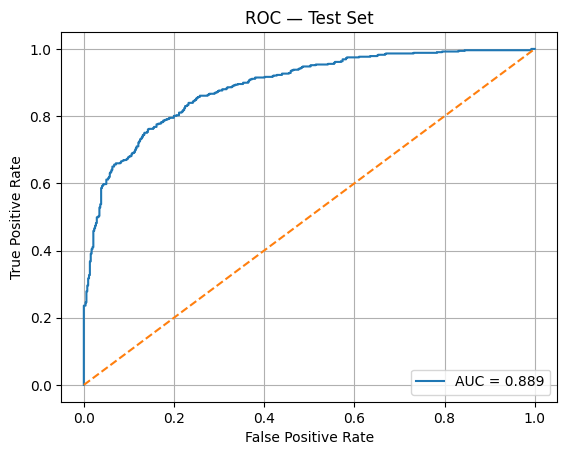

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

def _score_vector(model, X):
    # Works for pipelines or plain estimators
    if hasattr(model, "predict_proba"):
        S = model.predict_proba(X)
        return S
    if hasattr(model, "decision_function"):
        S = model.decision_function(X)
        # decision_function may return shape (n_samples,) for binary;
        # convert to (n_samples, 2) like proba for uniform handling
        if S.ndim == 1:
            S = np.c_[1 - (S - S.min()) / (S.max() - S.min() + 1e-12),
                      (S - S.min()) / (S.max() - S.min() + 1e-12)]
        return S
    # Fallback (not ideal for ROC): use predictions as scores
    P = model.predict(X)
    # make a 2-col "score" guess
    return np.c_[1 - P, P]

def plot_roc(model, X, y, lbl_enc=None, positive_class_name=None, title="ROC Curve"):
    # Determine classes and binarize y if needed
    classes = np.unique(y)
    is_binary = len(classes) == 2

    # Scores: shape (n_samples, n_classes) if possible
    S = _score_vector(model, X)

    plt.figure()
    if is_binary:
        # pick positive label
        if positive_class_name is not None and lbl_enc is not None:
            pos_label = lbl_enc.transform([positive_class_name])[0]
        else:
            # default: label "1" is positive (LabelEncoder likely mapped 'sadness' to 1)
            pos_label = 1

        # Get score column for pos class
        # If S is 1D, make it a 2D proba-like array above; else select the correct column
        if S.ndim == 1:
            pos_scores = S
        else:
            # find index of pos_label among model.classes_ if available; else assume column 1
            if hasattr(model, "classes_"):
                # handle pipeline: try to get final estimator
                clf = model
                if hasattr(model, "named_steps") and "clf" in model.named_steps:
                    clf = model.named_steps["clf"]
                if hasattr(clf, "classes_"):
                    class_order = clf.classes_
                    # find column idx of pos_label
                    try:
                        col = list(class_order).index(pos_label)
                    except ValueError:
                        col = 1  # fallback
                    pos_scores = S[:, col]
                else:
                    pos_scores = S[:, 1] if S.shape[1] > 1 else S.ravel()
            else:
                pos_scores = S[:, 1] if S.shape[1] > 1 else S.ravel()

        fpr, tpr, _ = roc_curve(y, pos_scores, pos_label=pos_label)
        auc_val = roc_auc_score(y, pos_scores)
        plt.plot(fpr, tpr, label=f"AUC = {auc_val:.3f}")
    else:
        # One-vs-rest micro-average
        Y = label_binarize(y, classes=classes)
        # If S is binary scores, convert to one score per class
        if S.ndim == 1:
            S = np.c_[1 - S, S]
        fpr, tpr, _ = roc_curve(Y.ravel(), S.ravel())
        auc_val = roc_auc_score(Y, S, average="micro", multi_class="ovr")
        plt.plot(fpr, tpr, label=f"micro-avg AUC = {auc_val:.3f}")

    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# ------- USE IT -------
# If you used GridSearchCV:
model = gs.best_estimator_   # or: model = your_fitted_pipeline_or_estimator
X_eval = X_test              # or X_val
y_eval = y_test              # or y_val

# If you want "happiness" as the positive class on the ROC:
# plot_roc(model, X_eval, y_eval, lbl_enc=lbl_enc, positive_class_name="happiness")

# Default (positive label = 1, likely 'sadness'):
plot_roc(model, X_eval, y_eval, lbl_enc=lbl_enc, title="ROC — Test Set")